#  明确课题：

在泰坦尼克号之灾事件中，主要探寻生还率和各因素（客舱等级、年龄、性别、上船港口等）的关系。

#  课题分析：

##  选择课题

一个二分类问题。常用的分类算法有逻辑回归、随机森林、支持向量机（SVM）等等。
我们可以选择其中的一种算法进行模型建立，或是尝试使用多种算法建立模型并融合。
对于同一个问题，可以尝试多种思路进行解决，尤其是算法模型建立的过程，与问题的背景，数据的类型，分析计算条件的限制都有关系。

##  模型的建立

模型的建立和优化是一个动态的过程，其中有许多尝试和反复，先试图建立一个基本的模型，然后再一步步不断的优化。

##  模型的优化

优化过程包括：  
A.分析现在模型的拟合状态（欠/过拟合？）  
B.分析模型中使用的特征的贡献大小，进行特征选择，这也是特征工程的一部分。  
C.预测失败案例产生的原因。

#  认识数据：

In [8]:
# 用于数据分析
import pandas as pd
import numpy as np

# 用于绘图
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 导入数据

In [9]:
titanic = pd.read_csv("train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  了解数据

passengerId:乘客ID  
survived:是否被救获  
Pclass:乘客等级（舱位等级分为1/2/3等）  
Name:乘客姓名  
Sex:乘客性别  
Age:乘客年龄  
SibSp:siblings&spoused,该乘客在船上的堂兄弟妹/配偶人数  
Ticket:船票信息  
Fare:票价  
Cabin:客舱  
Embarked:登船港口

In [10]:
titanic.info()
titanic.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

通过对数据的初步观测，这个数据样本一共有 891 行 * 12 列数据,字段包含：  
‘PassengerId（乘客id）’, ‘Survived（是否活下来）’, ‘Pclass（船舱等级）’, ‘Name（姓名）’, ‘Sex（性别）’, ‘Age（年龄）’, ‘SibSp（兄弟姐妹同行数量）’,‘Parch（父母配偶同行数量）’, ‘Ticket（票）’, ‘Fare（费）’, ‘Cabin（船舱）’, ‘Embarked（上船站）’

其中， 定类变量 包括 Survived，Sex，Embarked， 定序变量 包括 Pclass， 数字变量 包括 PassengerId，Age，SibSp，Parch，Fare

通过观测发现，Age、Cabin、Embarked 包含了有空值

In [11]:
# 字段分析
def y(x):
    return titanic[x].unique()
print('='*20 + 'Survived字段内容' + '='*20)
print(y('Survived'))
print('='*20 + 'Sex字段内容' + '='*20)
print(y('Sex'))
print('='*20 + 'Pclass字段内容' + '='*20)
print(y('Pclass'))
print('='*20 + 'Embarked字段内容' + '='*20)
print(y('Embarked'))

====================Survived字段内容====================
[0 1]
====================Sex字段内容====================
['male' 'female']
====================Pclass字段内容====================
[3 1 2]
====================Embarked字段内容====================
['S' 'C' 'Q' nan]


Survived 的值：0（死亡），1（存活）  
Sex 的值：male（男性），female（女性）  
Embarked的值包含 ‘S’ ‘C’ ‘Q’

### 重复的值

In [12]:
# 显示有空值的列
print(titanic['Age'].isnull().value_counts())
print('-'*50)
print(titanic['Embarked'].isnull().value_counts())
print('-'*50)

False    714
True     177
Name: Age, dtype: int64
--------------------------------------------------
False    889
True       2
Name: Embarked, dtype: int64
--------------------------------------------------


Age 一共有 714 行空数据  
Cabin（船舱）一共有 204 行空数据  
Embarked（上船站）一共有 2 行空数据。

In [13]:
# 描述性分析
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


在这次旅行的 891 名乘客中，有 38% 的人活了下来，幸运儿。  
所有旅客中，年龄最小的只有 0.4 岁，最大的有 80 岁，平均年龄在 28 岁左右。  
平均每个乘客有 0.52 个兄弟姐妹陪同，有 0.38 个父母配偶陪同。  
有些乘客居然有 8 名同行的人。  
旅客为这趟旅行平均花费 32 美元，最高花费 512 美元（贵族吧）

### 数据清洗

In [14]:
#删除不需要的列
titanic.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

In [15]:
#将将船舱等级设为 0,1,2
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2
print (titanic["Embarked"].unique())

[0 1 2]


In [16]:
#将性别转为0,1
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1
print(titanic.loc[:5,'Sex'])

0    0
1    1
2    1
3    1
4    0
5    0
Name: Sex, dtype: object


In [17]:
# 处理空值

titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic["Embarked"]=titanic["Embarked"].fillna('S')

# 基本情况分析

In [18]:
train_np = titanic.values
# y即Survival的结果
y = train_np[:, 0]
# X即特征值
X = train_np[:, 1:]

In [19]:
from sklearn.linear_model import LogisticRegression  #导入逻辑回归模型 
clf = LogisticRegression(penalty='l2',solver='newton-cg',multi_class='multinomial')
clf.fit(X,y.astype('int'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#导入测试集
data_test = pd.read_csv('test.csv')

#中位数代替年龄空缺
data_test["Age"] = data_test["Age"].fillna(data_test["Age"].median())

#性别转为0，1
data_test.loc[data_test["Sex"] == "male", "Sex"] = 0
data_test.loc[data_test["Sex"] == "female", "Sex"] = 1

#用S代替上船地点，并转变成0，1，2
data_test["Embarked"] = data_test["Embarked"].fillna('S')
data_test.loc[data_test["Embarked"] == "S", "Embarked"] = 0
data_test.loc[data_test["Embarked"] == "C", "Embarked"] = 1
data_test.loc[data_test["Embarked"] == "Q", "Embarked"] = 2

#用中位数代替费用空缺
data_test["Fare"] = data_test["Fare"].fillna(data_test["Fare"].median())

#去掉无用列
test_np = data_test[[ 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex','Pclass']]

test_np.head(100)

,Age,SibSp,Parch,Fare,Embarked,Sex,Pclass
0,34.5,0,0,7.8292,2,0,3
1,47.0,1,0,7.0000,0,1,3
2,62.0,0,0,9.6875,2,0,2
3,27.0,0,0,8.6625,0,0,3
4,22.0,1,1,12.2875,0,1,3
...,...,...,...,...,...,...,...
95,25.0,0,0,7.7958,0,0,3
96,76.0,1,0,78.8500,0,1,1
97,29.0,0,0,7.9250,0,0,3
98,20.0,0,0,7.8542,0,1,3


In [21]:
# 预测
predicted_np = clf.predict(test_np)
#print(predicted_np)
result=pd.DataFrame({'PassengerId':data_test['PassengerId'].values,'Survived':predicted_np.astype('float')})
# 将结果导出到csv文件,不带索引
result.to_csv('predictions.csv', index=False)

## 交叉验证

在实际训练中，模型通常对训练数据表现好，对非训练数据拟合程度较差，通过将训练集本身随机分成K份，相当于有了多对训练集和测试集，同一个模型可以产生多个准确率，比较多个可能的模型进行交叉验证的结果的准确率方差后，可以比较各个模型的泛化能力。

In [22]:
from sklearn import model_selection
from sklearn import linear_model
# 将训练集分成5份，4份用来训练模型，1份用来预测，这样就可以用不同的训练集在一个模型中训练

clf = linear_model.LogisticRegression()
# 定义特征集和结果集
X = train_np[:, 1:]
y = train_np[:, 0]
print(model_selection.cross_val_score(clf, X, y.astype('int'), cv=5))

[0.79329609 0.79213483 0.78651685 0.76404494 0.83146067]


E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

## 学习曲线

### 过拟合

通过不断的进行特征工程，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合的越来越好，同时也可能在丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合现象。

### 欠拟合

从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，
也有可能是欠拟合，也就是说，即使在训练集上也表现得不那么好。

### 优化

在机器学习问题上，对于过拟合和欠拟合两种情形的优化方式是不同的。  
对于过拟合而言，通常以下策略对结果优化是有用的：  
A 做一下特征选择，挑出较好的特征的子集来做训练；  
B 提供更多的数据，从而弥补原始数据的偏差问题，学习到的模型也会更准确。  
而对于欠拟合，通常需要更多的特征，更复杂的模型来提高准确度。  
著名的学习曲线（learning curve)可以帮助我们判定我们的模型现在所处的状态

我们以样本数据为横坐标，训练和交叉验证集上的错误率为纵坐标的两种状态分别如下：

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    参数解释
    ----------
    estimator : 分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.rcParams['font.sans-serif'] = 'SimHei'  ## 设置中文显示
        plt.rcParams['axes.unicode_minus'] = False
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\anaconda\Anaconda3\envs\BDAI2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

(0.7918666377643173, 0.02823835729737656)

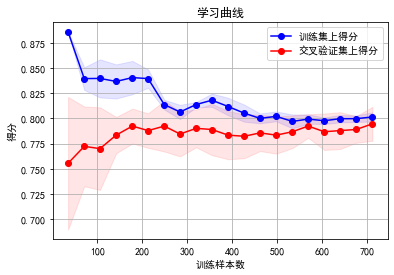

In [24]:
plot_learning_curve(clf, u"学习曲线", X, y.astype('int'))

目前的曲线看来，我们的model并不处于overfitting的状态(overfitting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。因此可以再做些feature engineering的工作，添加一些新产出的特征或者组合特征到模型中。